# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
!ls

car_data.csv  sample_data


In [ ]:
df = pd.read_csv("car_data.csv")

#Data Cleaning and Exploration

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

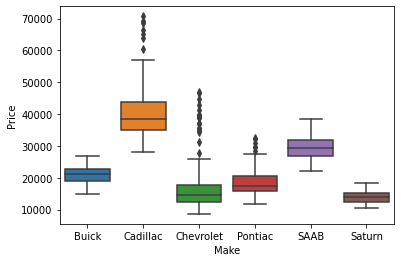

In [ ]:
sns.boxplot(x="Make", y="Price", data=df);

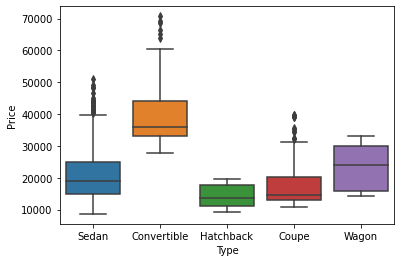

In [ ]:
sns.boxplot(x="Type", y="Price", data=df);

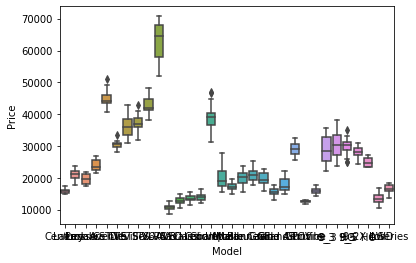

In [ ]:
sns.boxplot(x="Model", y="Price", data=df);

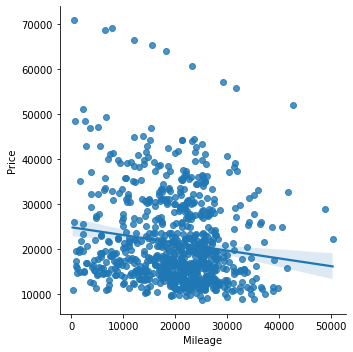

In [ ]:
sns.lmplot(x="Mileage", y="Price", data=df);

In [ ]:
# Train test data splitting
X = df[["Mileage"]]
y = df["Price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42)

In [ ]:
#1. Find the linear regression equation for mileage vs price.
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print(model.coef_, model.intercept_)

R2- SCORE: 0.03663481887535347
[-0.15257368] 24462.674220782534


Price = -.1525 x Mileage + 24462

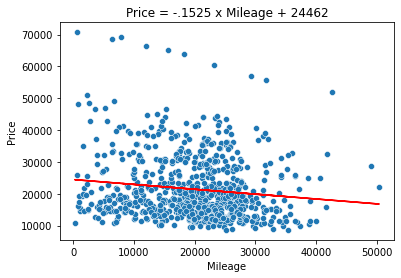

In [ ]:
#2. Chart the original data and the equation on the chart.
m = model.coef_
c = model.intercept_

sns.scatterplot(x="Mileage", y="Price", data=df)
plt.plot(X, X*m + c, color="red")
plt.title("Price = -.1525 x Mileage + 24462")
plt.show()

In [ ]:
# Find the equation's R2 score (use the .score method) 
# to determine whether the equation is a good fit for this data. 
# (0.8 and greater is considered a strong correlation.)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.03663481887535347


R2 score is low and we can conclude that there is no linear relationship between Mileage and the Price.

# Building a better model

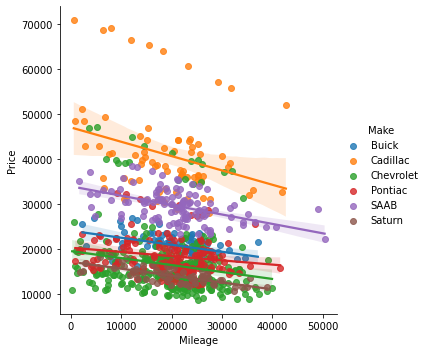

In [ ]:
# Price vs. Mileage within different Make groups
sns.lmplot(x="Mileage", y="Price", data=df, hue="Make");

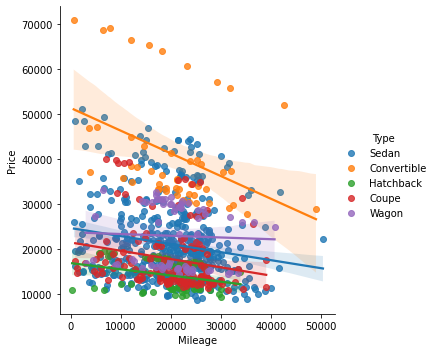

In [ ]:
# Price vs. Mileage within different Type groups
sns.lmplot(x="Mileage", y="Price", data=df, hue="Type");

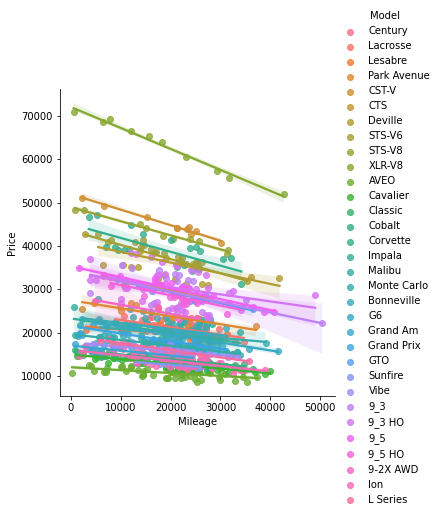

In [ ]:
# Price vs. Mileage within different model groups
sns.lmplot(x="Mileage", y="Price", data=df, hue="Model");

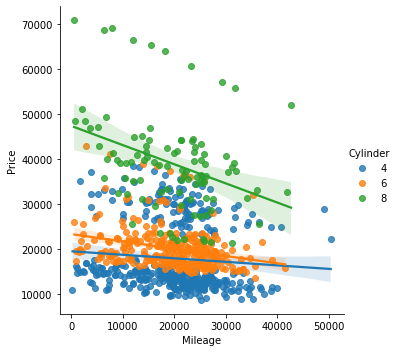

In [ ]:
#mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation
sns.lmplot(x="Mileage", y="Price", data=df, hue="Cylinder");

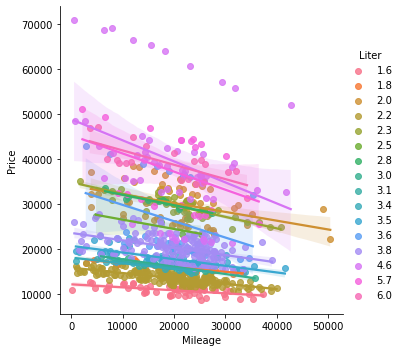

In [ ]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Liter");

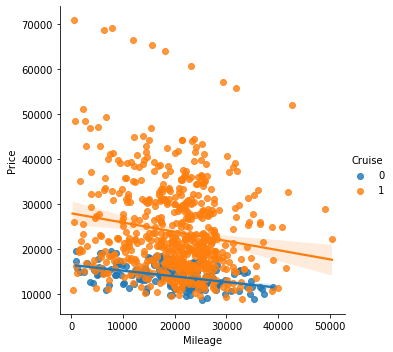

In [ ]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Cruise");

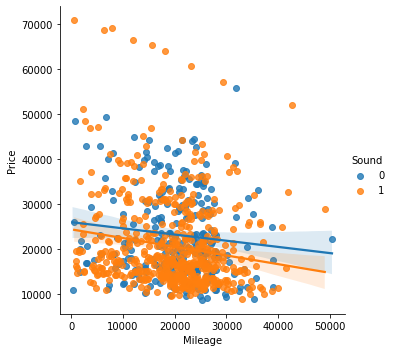

In [ ]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Sound");

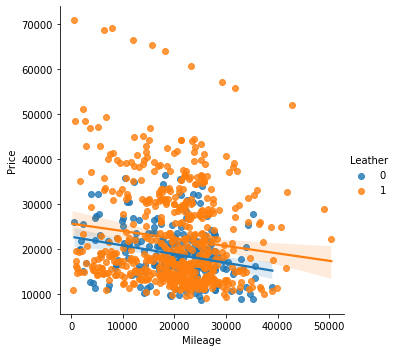

In [ ]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Leather");

In [ ]:
# From the data visualization, it seems that the price as a function
# of Mileage and Make could be a good model.

In [ ]:
# Encode Model Column with one-hot encoding
# Create feature and target
df2 = pd.get_dummies(df['Model'])
X   = pd.concat((df2, df[["Mileage"]]), axis=1)
y   = df["Price"]
X.shape, y.shape

((804, 33), (804,))

In [ ]:
X.head()

,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,...,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Mileage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8221
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9135
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13196
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16342
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19832


In [ ]:
# Train Test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42)

In [ ]:
#1. Find the linear regression equation for mileage vs price.
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
#print(model.coef_, model.intercept_)

R2- SCORE: 0.9598625013259796


# Finding the best combination of features to predict the price:

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Finding All combinations of categorical features
features = ["Make", "Model", "Trim", "Type", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]
combi = []
for i in range(2,len(features)+1,1):
   combi.append(list(itertools.combinations(features,i)))

# Flattaning the list
all_combi = [y for x in combi for y in x]

# Creating an empty list to store all scores
score = []

for x in all_combi:
  features = list(x)

  # Creating Feature and Target
  df2 = df[features]
  df2 = pd.get_dummies(data=df2, columns=features)
  X   = pd.concat((df2, df[["Mileage"]]), axis=1)
  y   = df["Price"]

  # Train Test Splitting
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.25, random_state=42)

  # Build Model
  model = LinearRegression()
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  #print(features,'R2- SCORE:', metrics.r2_score(y_test,y_pred))
  score.append([metrics.r2_score(y_test,y_pred), features])

# Sorting and printing
score.sort()
print("Best Model is:")
print(score[-1])

Best Model is:
[0.9914883414177953, ['Model', 'Trim', 'Cylinder', 'Leather']]
